# Evaluating Your Models

In this part of the tutorial, we'll talk about how to evaluate models
* Training procedures - the good, the bad, and the ugly
    * Why *not* simple train-test splits
    * $k$-fold cross validation
* Model metrics
    * Confusion matrices, and accuracy scores
    * AUC Score
    * F1-score

## Part 1: Training procedures

### Last time on training procedures

![](../applied_ml_1/images/train_test_split.svg)

Is this actually a good training procedure?

![](images/mnist.jpg)

## Summary: For your results to be good, your experimental procedures have to be good

* Not all 100%'s are created equal. 
* We need proper procedures of actually evaluating a model

## Simple train-test split procedures are erroneous
* Depending on your training / testing set split, your accuracy results are going to be different.
    * If your algorithm scores well on a testing set, is it *actually* good?
    * This is called **model variance**. It relates to how models fit to their training set. (Fitting versus underfitting.)
* Goal of machine learning is to create **generalizable algorithms**. We need more robust training methods

## The more robust way: $k$-fold cross validation

1. Split the dataset into $k$ evenly sized sets, called *folds*.
2. For each $i$th fold
    1. Train the model on each other $j\neq i$ fold.
    2. Evaluate the model on this $i$th fold, record the accuracy
3. Record the *average* accuracy over all $k$ folds

![](images/cross_validation.svg)


Unlike the techniques in my previous tutorial, $k$-fold cross validation isn't a way to improve model classification score. It's a way to publish more legitimate results.

In [3]:
import pandas as pd

prefix = "../datasets/"

columns=["mean corpuscular volume", "protein1", "protein2", 
         "protein3", "protein4", "number of drinks", "Has Liver Disorder"]
df = pd.read_csv(prefix + "liver.data", header=None, names=columns)

y = df["Has Liver Disorder"]
X = df.drop("Has Liver Disorder", axis=1)

## Doing $k$-fold cross validation in scikit-learn

In [5]:
# Documentation: 
#    http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold
from sklearn.metrics import accuracy_score

total_accuracy = 0
kfold = KFold(len(X), n_folds=10, shuffle=True, random_state=0)
for train_indices, test_indices in kfold:
    X_train, y_train = X.loc[train_indices], y[train_indices]
    X_test, y_test = X.loc[test_indices], y[test_indices]
    
    scaler = StandardScaler().fit(X_train)
    _X_train = scaler.transform(X_train)
    _X_test = scaler.transform(X_test)
    
    clf = LogisticRegression().fit(_X_train, y_train)
    predictions = clf.predict(_X_test)
    
    total_accuracy += accuracy_score(y_test, predictions)
print "Logistic Regression score after 10-fold cross validation: ", total_accuracy / float(10)

Logistic Regression score after 10-fold cross validation:  0.692773109244


What if you wanted an even distribution of classes per fold? Use a **stratified** $k$-fold cross validation procedure. (Below.)

## More resources
* [Machine Learning Mastery](http://machinelearningmastery.com/how-to-choose-the-right-test-options-when-evaluating-machine-learning-algorithms/), discusses other techniques to evaluate a model

## Part 2: Model Metrics

Why metrics?

![](images/yoda.jpeg)

* **Model metric**: Describes "performance" of your model
    * Performing well in one metric does not guarantee success in another
    * Your algorithm can be tuned to optimize in one metric instead of another. See [Weston, J., et al.](http://www.thespermwhale.com/jaseweston/papers/wsabie-ijcai.pdf) for an example
* Some metrics for classification
    * Accuracy scores (from confusion matrices)
    * AUC Score
* Some metrics I won't get to
    * Precision / recall
    * F1-scores

### Part 2.1: Accuracy score

This is the simpliest of all metrics for classification. Suppose you have a multi-class classification problem. The accuracy score is simply

$$\frac{\text{Number of samples labeled correctly}}{\text{Total number of samples}}$$

A related data structure is the confusion matrix, which summarizes samples predicted correctly and incorrectly.

### Binary classification confusion matrix

![](images/confusionmatrix.png)

### Multi-class classification confusion matrix 

* Usually represented by counts, not percentages. Oh well.

![](images/confusion2.png)

## The [MNIST dataset ](http://yann.lecun.com/exdb/mnist/)

* By [Yann LeCun](https://en.wikipedia.org/wiki/Yann_LeCun), currently a research scientist at Facebook
* Popular dataset for handwritten digit recognition
* Motivated for neural networks because of the high dimensionality. But can use SVM or whatever just as well
* Scikit-Learn has utilities that automatically download the digits

In [ ]:
# Source: http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html

# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
%matplotlib inline
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

In [ ]:
# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 3 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# pylab.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.0001)

# We learn the digits on the first half of the digits
classifier.fit(data[:n_samples / 2], digits.target[:n_samples / 2])

# Now predict the value of the digit on the second half:
expected = digits.target[n_samples / 2:]
predicted = classifier.predict(data[n_samples / 2:])

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       0.99      0.99      0.99        88
          1       0.95      0.90      0.93        91
          2       1.00      0.94      0.97        86
          3       0.95      0.87      0.91        91
          4       0.99      0.95      0.97        92
          5       0.90      0.96      0.93        91
          6       0.99      0.99      0.99        91
          7       0.92      0.98      0.95        89
          8       0.92      0.89      0.90        88
          9       0.83      0.95      0.88        92

avg / total       0.94      0.94      0.94       899


Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 82  0  0  0  1  0  0  0  8]
 [ 1  0 81  2 

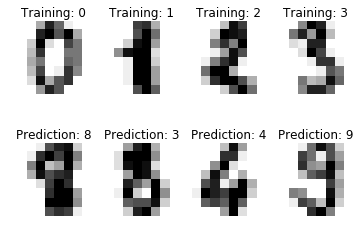

In [10]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

images_and_predictions = list(zip(digits.images[n_samples / 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

### Part 2.2: The AUC Score

Up until now, we have assumed that binary classification algorithms can only output binary labels. This is not always the case; we can output probabilities that represent class association.

* Let's assume a binary classification setting, and assume class labels $y_i \in \{0, 1\}$
* Our previous assumption was $f(\vec{x}) \in \{0, 1\}$ (or $\{1, -1\}$). Now, assume what if $f(\vec{x}) \in [0, 1]$, like a probability

**Receiver operating characteristic**. By changing the threshold for which we consider $\vec{x}$ to be of class $0$ or $1$, we collect a *true positive rate* and a *false positive rate*. This is called the receiver operator characteristic curve. (ROC curve).

The area underneath the ROC curve is the *AUC* (area under curve). It's between 0 and 1, but don't treat it like a probability.

## The iris dataset

* Probably one of the world's most known datasets
* Classify the identity of a flower based upon features of the flower's petal size, stem size, etc
* Note that SVMs can normally get 100% on this dataset; the procedure below added noise to the feature matrix

In [19]:
# Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html

import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import StratifiedKFold

# Way to change sizes of plots
# http://stackoverflow.com/a/332311/2014591
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

###############################################################################
# Data IO and generation

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
X, y = X[y != 2], y[y != 2]  # Make this into a binary classification problem instead of multi-class
n_samples, n_features = X.shape

# Add noisy features
random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

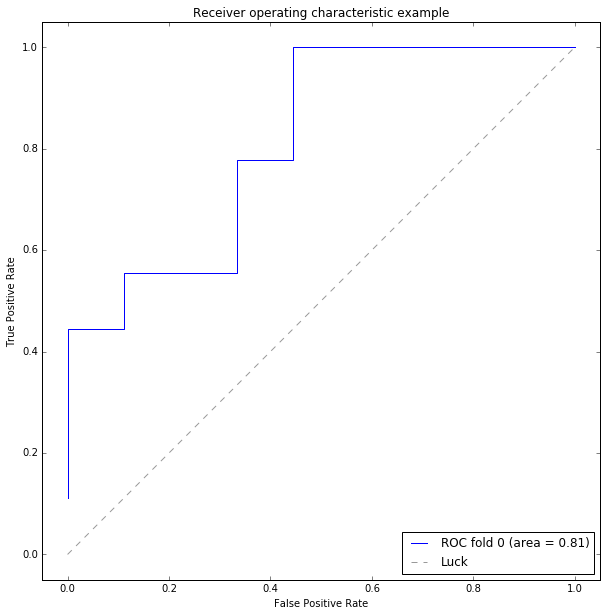

In [23]:
###############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(y, n_folds=6)
classifier = svm.SVC(kernel='linear', probability=True,
                     random_state=random_state)

for i, (train, test) in enumerate(cv):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
    break # For only one curve

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()